In [19]:
import xmitgcm
from xmitgcm import open_mdsdataset
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import xarray as xr
from xgcm import Grid
mpl.rcParams["font.size"] = 12

In [5]:
def getoutput(data_dir,prefix,grid_dir,iters):
    deltaTClock = 21600.
    #grid_dir = './K5000/'
    data = open_mdsdataset(data_dir,grid_dir,iters=iters,delta_t=deltaTClock,prefix=prefix,geometry='sphericalpolar',default_dtype=np.dtype)
    return data

def getoutput1(data_dir,prefix,grid_dir):
    deltaTClock = 21600.
    #grid_dir = './K5000/'
    data = open_mdsdataset(data_dir,grid_dir,delta_t=deltaTClock,prefix=prefix,geometry='sphericalpolar',default_dtype=np.dtype)
    return data

In [ ]:
# Wind stress, temperture, freshwater flux plot 

In [6]:
dyn20002=getoutput1('./K2000_taux2/','dyn','./K50grid/')
LastIter20002=(list(dyn20002.iter.values))
LastIter20002.sort()
dyn20002=getoutput('./K2000_taux2/','dyn','./K50grid/',LastIter20002[-10:])
lat=dyn20002.YC

In [8]:
Zwind=np.fromfile('./K50grid/taux.bin',dtype='>f4')
Zwind=Zwind.reshape(128,64)
Zwind.shape

(128, 64)

In [9]:
Zwind2=np.fromfile('./K500_taux2/taux2.bin',dtype='>f4')
Zwind2=Zwind2.reshape(128,64)
Zwind2.shape

(128, 64)

In [10]:
sst=np.fromfile('./K50grid/sst.bin',dtype='>f4')
sst=sst.reshape(128,64)
sst.shape

(128, 64)

In [11]:
sflux=np.fromfile('./K5000/sflux2.bin',dtype='>f4')
sflux=sflux.reshape(128,64)
sflux.shape

(128, 64)

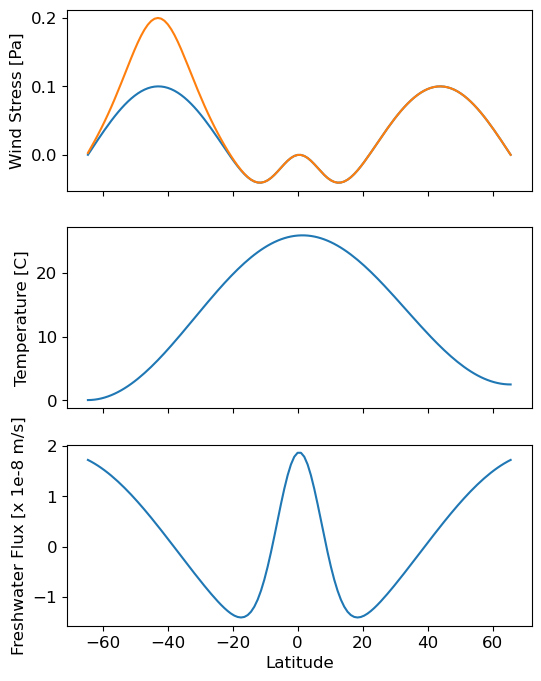

In [20]:
fig, axs = plt.subplots(nrows=3,figsize=(6,8),sharex=True)

axs[0].plot(lat,Zwind[:,0])
axs[0].plot(lat,Zwind2[:,0])
axs[0].set_ylabel('Wind Stress [Pa]')

axs[1].plot(lat,sst[:,0])
axs[1].set_ylabel('Temperature [C]')

axs[2].plot(lat,-1*sflux[:,0]/1e-8)
axs[2].set_ylabel('Freshwater Flux [x 1e-8 m/s]')
axs[2].set_xlabel('Latitude')

plt.savefig('model.png')

In [ ]:
#Surface Density plot

In [21]:
def density(dyn):
    rho=1035*(1-2e-4*dyn['THETA']+7.4e-4*(dyn['SALT']-35))
    return rho

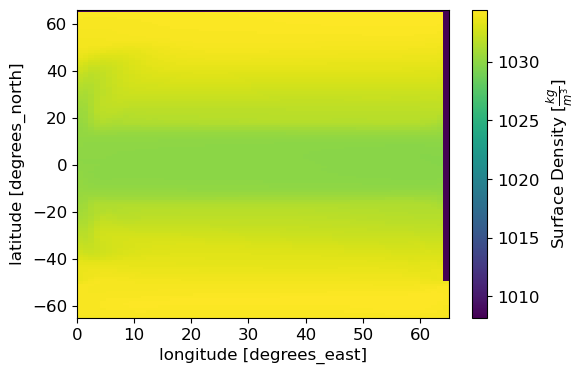

In [34]:
fig, axs = plt.subplots(figsize=(6,4))
rho20002=density(dyn20002)
C=rho20002.mean('time')[0].plot(ax=axs,add_colorbar=False)
plt.colorbar(C,label='Surface Density ['r'$ \frac{kg}{m^3} $'+']')
plt.title('')
plt.savefig('Surf_dens.png')

In [ ]:
#Diffusion plot

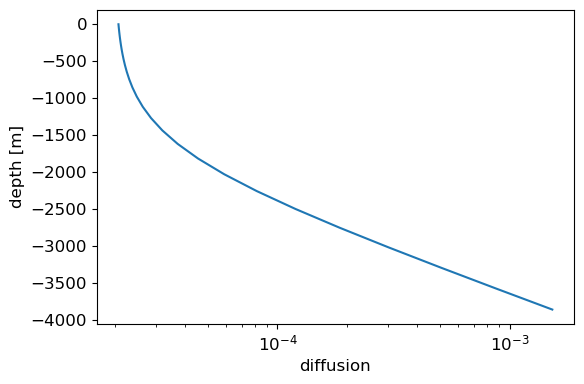

In [35]:
fig, ax = plt.subplots(figsize=(6,4))
z = np.fromfile('./K5000/RC.data',dtype='>f4')
zeta=500
diffusion = np.exp(-(4000+z)/zeta)/zeta/(1-np.exp(-4000/zeta))+2*10**-5
ax.semilogx(diffusion,z)
plt.ylabel('depth [m]')
plt.xlabel('diffusion')
plt.tight_layout()
plt.savefig('diffusion.png')